### Data Description

Here's a description of each feature in the dataset:

- *customer_id*: Unique identifier for each customer.
- *signup_date*: Date when the customer signed up.
- *country*: Country of the customer.
- *city*: City of the customer.
- *gender*: Gender of the customer.
- *age*: Age of the customer.
- *membership_tier*: Membership tier of the customer (e.g., Basic, Standard).
- *tenure_months*: Number of months the customer has been a member.
- *avg_session_length*: Average length of customer sessions in minutes.
- *sessions_per_month*: Number of sessions per month.
- *support_tickets*: Number of support tickets raised by the customer.
- *last_payment_method*: Last payment method used by the customer.
- *is_mobile_user*: Whether the customer is a mobile user (True/False).
- *num_devices*: Number of devices used by the customer.
- *email_click_rate*: Click rate for emails sent to the customer.
- *referral_count*: Number of referrals made by the customer.
- *discount_rate*: Discount rate applied to the customer.
- *satisfaction_score*: Customer satisfaction score.
- *monthly_spend*: Monthly spend of the customer (Regression Target).
- *churn*: Whether the customer churned (1) or not (0) (Classification Target).

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Wrangling & Cleaning
<ul>
<li>Handle Missing Values
<li>Fix incorrect or inconsistent data types
<li>Drop duplicate if needed

In [36]:
df = pd.read_csv('/content/synthetic_customer_analytics_6500_with_issues.csv')
df

,customer_id,signup_date,country,city,gender,age,membership_tier,tenure_months,avg_session_length,sessions_per_month,support_tickets,last_payment_method,is_mobile_user,num_devices,email_click_rate,referral_count,discount_rate,satisfaction_score,monthly_spend,churn
0,100000,2025-02-24,Malaysia,Kuala Lumpur,Other,39.0,Standard,8,21.51,21.0,0,Credit Card,True,2,0.315,0,0.138,6.9,44.62,0
1,100001,2021-04-24,Philippines,Cebu,Male,51.0,Basic,55,19.60,16.0,1,PayPal,False,2,0.224,0,0.000,5.7,54.71,0
2,100002,2019-05-29,Thailand,Phuket,Female,29.0,Standard,78,31.98,18.0,0,Credit Card,True,5,0.053,0,0.112,6.3,22.40,0
3,100003,2018-01-01,Indonesia,Jakarta,Female,43.0,Standard,95,12.71,19.0,2,Credit Card,False,3,0.231,1,0.117,7.3,63.13,0
4,100004,2021-06-16,Malaysia,Shah Alam,Male,51.0,Standard,53,3.00,15.0,1,NaN,True,3,0.036,0,0.114,5.8,33.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,102395,2025-05-04,Malaysia,Shah Alam,Male,18.0,Basic,6,23.97,22.0,1,Credit Card,True,3,0.330,0,0.133,3.8,43.61,0
6616,100994,2019-04-23,Malaysia,Ipoh,Male,53.0,Standard,79,10.30,14.0,0,PayPal,True,3,NaN,0,0.031,6.0,23.61,0
6617,105888,2021-08-11,Vietnam,Hai Phong,Female,33.0,Basic,51,13.95,21.0,0,Debit Card,False,2,0.519,2,0.000,5.3,37.95,0
6618,101078,2024-07-17,Malaysia,Johor Bahru,Female,49.0,Standard,16,14.82,16.0,1,Debit Card,True,3,0.218,0,0.115,5.2,63.16,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          6620 non-null   int64  
 1   signup_date          6620 non-null   object 
 2   country              6620 non-null   object 
 3   city                 6423 non-null   object 
 4   gender               6424 non-null   object 
 5   age                  6423 non-null   float64
 6   membership_tier      6620 non-null   object 
 7   tenure_months        6620 non-null   int64  
 8   avg_session_length   6419 non-null   float64
 9   sessions_per_month   6422 non-null   float64
 10  support_tickets      6620 non-null   int64  
 11  last_payment_method  6419 non-null   object 
 12  is_mobile_user       6620 non-null   bool   
 13  num_devices          6620 non-null   int64  
 14  email_click_rate     6420 non-null   float64
 15  referral_count       6620 non-null   i

In [38]:
# standardize all text to lower case strings
def lower_case(x):
  if isinstance(x, str):
    return x.lower()
  else:
    return x

df = df.applymap(lower_case)

df

,customer_id,signup_date,country,city,gender,age,membership_tier,tenure_months,avg_session_length,sessions_per_month,support_tickets,last_payment_method,is_mobile_user,num_devices,email_click_rate,referral_count,discount_rate,satisfaction_score,monthly_spend,churn
0,100000,2025-02-24,malaysia,kuala lumpur,other,39.0,standard,8,21.51,21.0,0,credit card,True,2,0.315,0,0.138,6.9,44.62,0
1,100001,2021-04-24,philippines,cebu,male,51.0,basic,55,19.60,16.0,1,paypal,False,2,0.224,0,0.000,5.7,54.71,0
2,100002,2019-05-29,thailand,phuket,female,29.0,standard,78,31.98,18.0,0,credit card,True,5,0.053,0,0.112,6.3,22.40,0
3,100003,2018-01-01,indonesia,jakarta,female,43.0,standard,95,12.71,19.0,2,credit card,False,3,0.231,1,0.117,7.3,63.13,0
4,100004,2021-06-16,malaysia,shah alam,male,51.0,standard,53,3.00,15.0,1,NaN,True,3,0.036,0,0.114,5.8,33.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6615,102395,2025-05-04,malaysia,shah alam,male,18.0,basic,6,23.97,22.0,1,credit card,True,3,0.330,0,0.133,3.8,43.61,0
6616,100994,2019-04-23,malaysia,ipoh,male,53.0,standard,79,10.30,14.0,0,paypal,True,3,NaN,0,0.031,6.0,23.61,0
6617,105888,2021-08-11,vietnam,hai phong,female,33.0,basic,51,13.95,21.0,0,debit card,False,2,0.519,2,0.000,5.3,37.95,0
6618,101078,2024-07-17,malaysia,johor bahru,female,49.0,standard,16,14.82,16.0,1,debit card,True,3,0.218,0,0.115,5.2,63.16,0


In [39]:
df['membership_tier'].unique()

array(['standard', 'basic', 'premium', 'vip'], dtype=object)

**Missing Values**

In [40]:
df.isnull().sum()

,0
customer_id,0
signup_date,0
country,0
city,197
gender,196
age,197
membership_tier,0
tenure_months,0
avg_session_length,201
sessions_per_month,198


Null values:

city, gender, age, avg_session_length, sessions_per_month, last_payment_method, email_click_rate, discount_rate

In [41]:
df[['city', 'gender', 'age', 'avg_session_length', 'sessions_per_month', 'last_payment_method', 'email_click_rate', 'discount_rate']].head()

,city,gender,age,avg_session_length,sessions_per_month,last_payment_method,email_click_rate,discount_rate
0,kuala lumpur,other,39.0,21.51,21.0,credit card,0.315,0.138
1,cebu,male,51.0,19.60,16.0,paypal,0.224,0.000
2,phuket,female,29.0,31.98,18.0,credit card,0.053,0.112
3,jakarta,female,43.0,12.71,19.0,credit card,0.231,0.117
4,shah alam,male,51.0,3.00,15.0,NaN,0.036,0.114


In [42]:
numeric_cols = df.select_dtypes(include=np.number)
numeric_cols.columns

Index(['customer_id', 'age', 'tenure_months', 'avg_session_length',
       'sessions_per_month', 'support_tickets', 'num_devices',
       'email_click_rate', 'referral_count', 'discount_rate',
       'satisfaction_score', 'monthly_spend', 'churn'],
      dtype='object')

In [43]:
categorical_cols = df.select_dtypes(exclude=np.number)
categorical_cols.columns

Index(['signup_date', 'country', 'city', 'gender', 'membership_tier',
       'last_payment_method', 'is_mobile_user'],
      dtype='object')

In [44]:
df['gender'] = df['gender'].fillna('other')
df['gender'].unique()

array(['other', 'male', 'female'], dtype=object)

In [45]:
# Fill missing values
# Fill numeric with median (column by column)
for col in numeric_cols:
    med = df[col].median()
    df[col] = df[col].fillna(med)

# Fill categorical with unknown
for col in categorical_cols:
    df[col] = df[col].fillna("unknown")

print("\nMissing values left after imputation:")
print(df.isna().sum().sort_values(ascending=False).head())


Missing values left after imputation:
customer_id    0
signup_date    0
country        0
city           0
gender         0
dtype: int64


In [46]:
df.isnull().sum()

,0
customer_id,0
signup_date,0
country,0
city,0
gender,0
age,0
membership_tier,0
tenure_months,0
avg_session_length,0
sessions_per_month,0


**Duplicated Rows**

In [47]:
# check df shape before remove rows
df.shape

(6620, 20)

In [48]:
df.duplicated().sum()

np.int64(113)

In [49]:
# remove duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(6507, 20)

**Data Type Conversion**

In [50]:
# date to datetime format
df['signup_date'] = pd.to_datetime(df['signup_date'])

#age and sessions_per_month to integer
df['age'] = df['age'].astype(int)
df['sessions_per_month'] = df['sessions_per_month'].astype(int)

**Outlier Detection**

In [51]:
# Identify outliers using IQR
print("\nIdentifying outliers using IQR:")
outlier_indices = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices[col] = outliers
    print(f"  {col:>20}: {len(outliers)} outliers identified")

# Combine indices from all columns
all_outlier_indices = [idx for indices in outlier_indices.values() for idx in indices]
all_outlier_indices = list(set(all_outlier_indices)) # Remove duplicates

print(f"\nTotal unique outliers identified across numeric columns: {len(all_outlier_indices)}")


Identifying outliers using IQR:
           customer_id: 0 outliers identified
                   age: 62 outliers identified
         tenure_months: 0 outliers identified
    avg_session_length: 42 outliers identified
    sessions_per_month: 24 outliers identified
       support_tickets: 174 outliers identified
           num_devices: 32 outliers identified
      email_click_rate: 77 outliers identified
        referral_count: 44 outliers identified
         discount_rate: 27 outliers identified
    satisfaction_score: 21 outliers identified
         monthly_spend: 103 outliers identified
                 churn: 32 outliers identified

Total unique outliers identified across numeric columns: 607


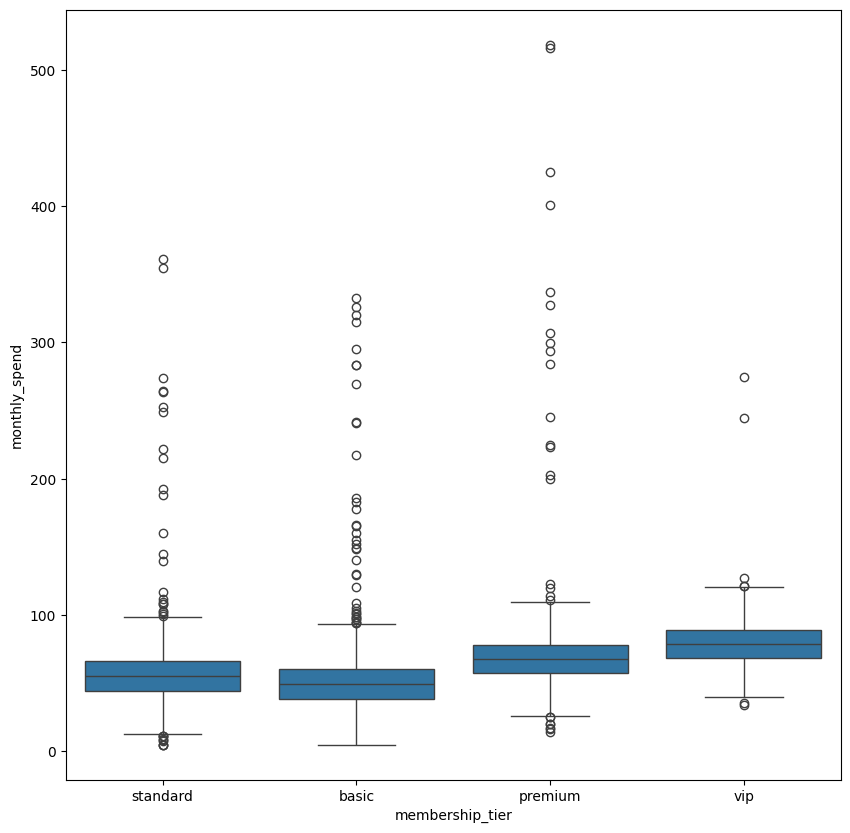

In [52]:
plt.figure(figsize = (10,10))

sns.boxplot(x = 'membership_tier', y = 'monthly_spend', data = df)
plt.show()

# Feature Engineering

In [53]:
df.shape

(6507, 20)

In [54]:
# Total engagement time per month
df['total_session_time'] = df['avg_session_length'] * df['sessions_per_month']

# Normalized complaint rate (safe division)
df['complaint_rate'] = df['support_tickets'] / (df['tenure_months'] + 1e-3)

# Responsiveness per session
df['clicks_per_session'] = df['email_click_rate'] / (df['sessions_per_month'] + 1e-3)

# Device spread per session
df['device_per_session'] = df['num_devices'] / (df['sessions_per_month'] + 1e-3)

# Referral frequency
df['referral_per_month'] = df['referral_count'] / (df['tenure_months'] + 1e-3)

# Loyalty score: tenure × satisfaction
df['loyalty_score'] = df['tenure_months'] * df['satisfaction_score']

# Engagement index: total session time × satisfaction
df['engagement_index'] = df['total_session_time'] * df['satisfaction_score']

# Referral value score: referrals × satisfaction
df['referral_value_score'] = df['referral_count'] * df['satisfaction_score']

# Discount sensitivity: discount × churn
df['discount_sensitivity'] = df['discount_rate'] * df['churn']

# Mobile loyalty flag: mobile users who stayed
df['mobile_loyalty_flag'] = df['is_mobile_user'].astype(int) * (1 - df['churn'])

# Signup month and day of week
df['signup_month'] = pd.to_datetime(df['signup_date']).dt.month
df['signup_dayofweek'] = pd.to_datetime(df['signup_date']).dt.dayofweek

# Display key interactions
display(df[[
    'total_session_time',
    'complaint_rate',
    'clicks_per_session',
    'device_per_session',
    'referral_per_month',
    'loyalty_score',
    'engagement_index',
    'referral_value_score',
    'discount_sensitivity',
    'mobile_loyalty_flag',
    'signup_month',
    'signup_dayofweek'
]].head())

,total_session_time,complaint_rate,clicks_per_session,device_per_session,referral_per_month,loyalty_score,engagement_index,referral_value_score,discount_sensitivity,mobile_loyalty_flag,signup_month,signup_dayofweek
0,451.71,0.000000,0.014999,0.095234,0.000000,55.2,3116.799,0.0,0.0,1,2,0
1,313.60,0.018181,0.013999,0.124992,0.000000,313.5,1787.520,0.0,0.0,0,4,5
2,575.64,0.000000,0.002944,0.277762,0.000000,491.4,3626.532,0.0,0.0,1,5,2
3,241.49,0.021052,0.012157,0.157886,0.010526,693.5,1762.877,7.3,0.0,0,1,0
4,45.00,0.018868,0.002400,0.199987,0.000000,307.4,261.000,0.0,0.0,1,6,2


In [55]:
df.shape

(6507, 32)

In [56]:
new_numeric_cols = df.select_dtypes(include=np.number)
new_numeric_cols.columns

Index(['customer_id', 'age', 'tenure_months', 'avg_session_length',
       'sessions_per_month', 'support_tickets', 'num_devices',
       'email_click_rate', 'referral_count', 'discount_rate',
       'satisfaction_score', 'monthly_spend', 'churn', 'total_session_time',
       'complaint_rate', 'clicks_per_session', 'device_per_session',
       'referral_per_month', 'loyalty_score', 'engagement_index',
       'referral_value_score', 'discount_sensitivity', 'mobile_loyalty_flag',
       'signup_month', 'signup_dayofweek'],
      dtype='object')

**Save Clean Dataset**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Trainocate_DSML/DSML_G3/final project/cleaned_data.csv', index=False)
df.head()

,customer_id,signup_date,country,city,gender,age,membership_tier,tenure_months,avg_session_length,sessions_per_month,...,clicks_per_session,device_per_session,referral_per_month,loyalty_score,engagement_index,referral_value_score,discount_sensitivity,mobile_loyalty_flag,signup_month,signup_dayofweek
0,100000,2025-02-24,malaysia,kuala lumpur,other,39,standard,8,21.51,21,...,0.014999,0.095234,0.000000,55.2,3116.799,0.0,0.0,1,2,0
1,100001,2021-04-24,philippines,cebu,male,51,basic,55,19.60,16,...,0.013999,0.124992,0.000000,313.5,1787.520,0.0,0.0,0,4,5
2,100002,2019-05-29,thailand,phuket,female,29,standard,78,31.98,18,...,0.002944,0.277762,0.000000,491.4,3626.532,0.0,0.0,1,5,2
3,100003,2018-01-01,indonesia,jakarta,female,43,standard,95,12.71,19,...,0.012157,0.157886,0.010526,693.5,1762.877,7.3,0.0,0,1,0
4,100004,2021-06-16,malaysia,shah alam,male,51,standard,53,3.00,15,...,0.002400,0.199987,0.000000,307.4,261.000,0.0,0.0,1,6,2


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6616
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           6507 non-null   int64         
 1   signup_date           6507 non-null   datetime64[ns]
 2   country               6507 non-null   object        
 3   city                  6507 non-null   object        
 4   gender                6507 non-null   object        
 5   age                   6507 non-null   int64         
 6   membership_tier       6507 non-null   object        
 7   tenure_months         6507 non-null   int64         
 8   avg_session_length    6507 non-null   float64       
 9   sessions_per_month    6507 non-null   int64         
 10  support_tickets       6507 non-null   int64         
 11  last_payment_method   6507 non-null   object        
 12  is_mobile_user        6507 non-null   bool          
 13  num_devices           6

In [60]:
# check the clean dataset
df_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trainocate_DSML/DSML_G3/final project/cleaned_data.csv')
df_clean.head()

,customer_id,signup_date,country,city,gender,age,membership_tier,tenure_months,avg_session_length,sessions_per_month,...,clicks_per_session,device_per_session,referral_per_month,loyalty_score,engagement_index,referral_value_score,discount_sensitivity,mobile_loyalty_flag,signup_month,signup_dayofweek
0,100000,2025-02-24,malaysia,kuala lumpur,other,39,standard,8,21.51,21,...,0.014999,0.095234,0.000000,55.2,3116.799,0.0,0.0,1,2,0
1,100001,2021-04-24,philippines,cebu,male,51,basic,55,19.60,16,...,0.013999,0.124992,0.000000,313.5,1787.520,0.0,0.0,0,4,5
2,100002,2019-05-29,thailand,phuket,female,29,standard,78,31.98,18,...,0.002944,0.277762,0.000000,491.4,3626.532,0.0,0.0,1,5,2
3,100003,2018-01-01,indonesia,jakarta,female,43,standard,95,12.71,19,...,0.012157,0.157886,0.010526,693.5,1762.877,7.3,0.0,0,1,0
4,100004,2021-06-16,malaysia,shah alam,male,51,standard,53,3.00,15,...,0.002400,0.199987,0.000000,307.4,261.000,0.0,0.0,1,6,2


In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6507 entries, 0 to 6506
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           6507 non-null   int64  
 1   signup_date           6507 non-null   object 
 2   country               6507 non-null   object 
 3   city                  6507 non-null   object 
 4   gender                6507 non-null   object 
 5   age                   6507 non-null   int64  
 6   membership_tier       6507 non-null   object 
 7   tenure_months         6507 non-null   int64  
 8   avg_session_length    6507 non-null   float64
 9   sessions_per_month    6507 non-null   int64  
 10  support_tickets       6507 non-null   int64  
 11  last_payment_method   6507 non-null   object 
 12  is_mobile_user        6507 non-null   bool   
 13  num_devices           6507 non-null   int64  
 14  email_click_rate      6507 non-null   float64
 15  referral_count       

# 2. Exploratory Data Analysis (EDA)

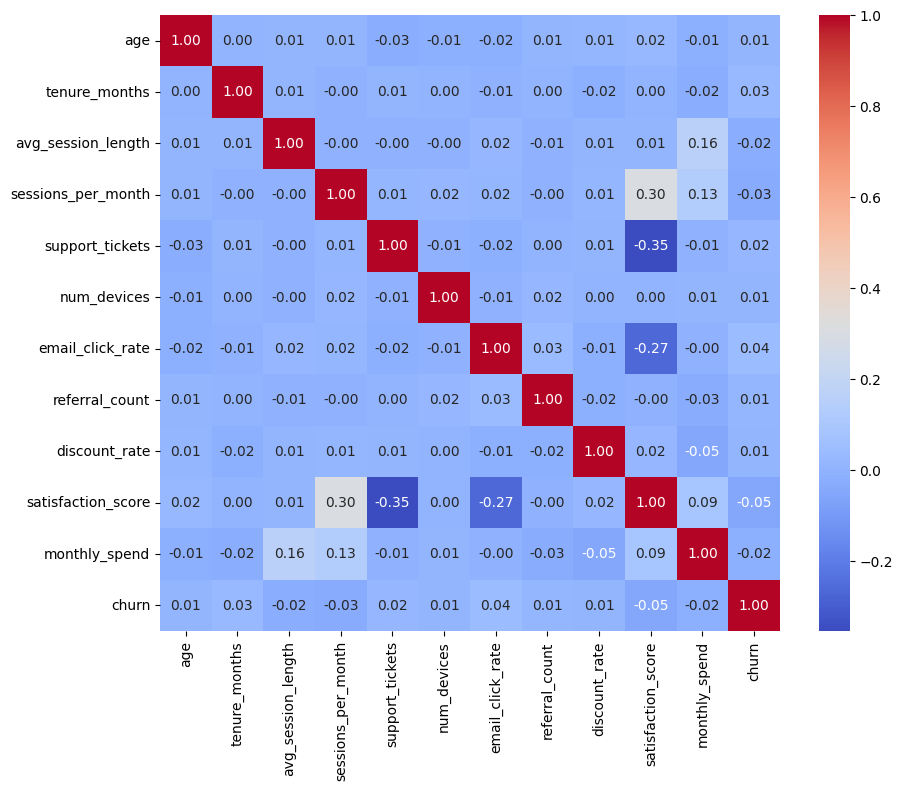

In [62]:
# heatmap for each features for correlation check
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.drop('customer_id', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

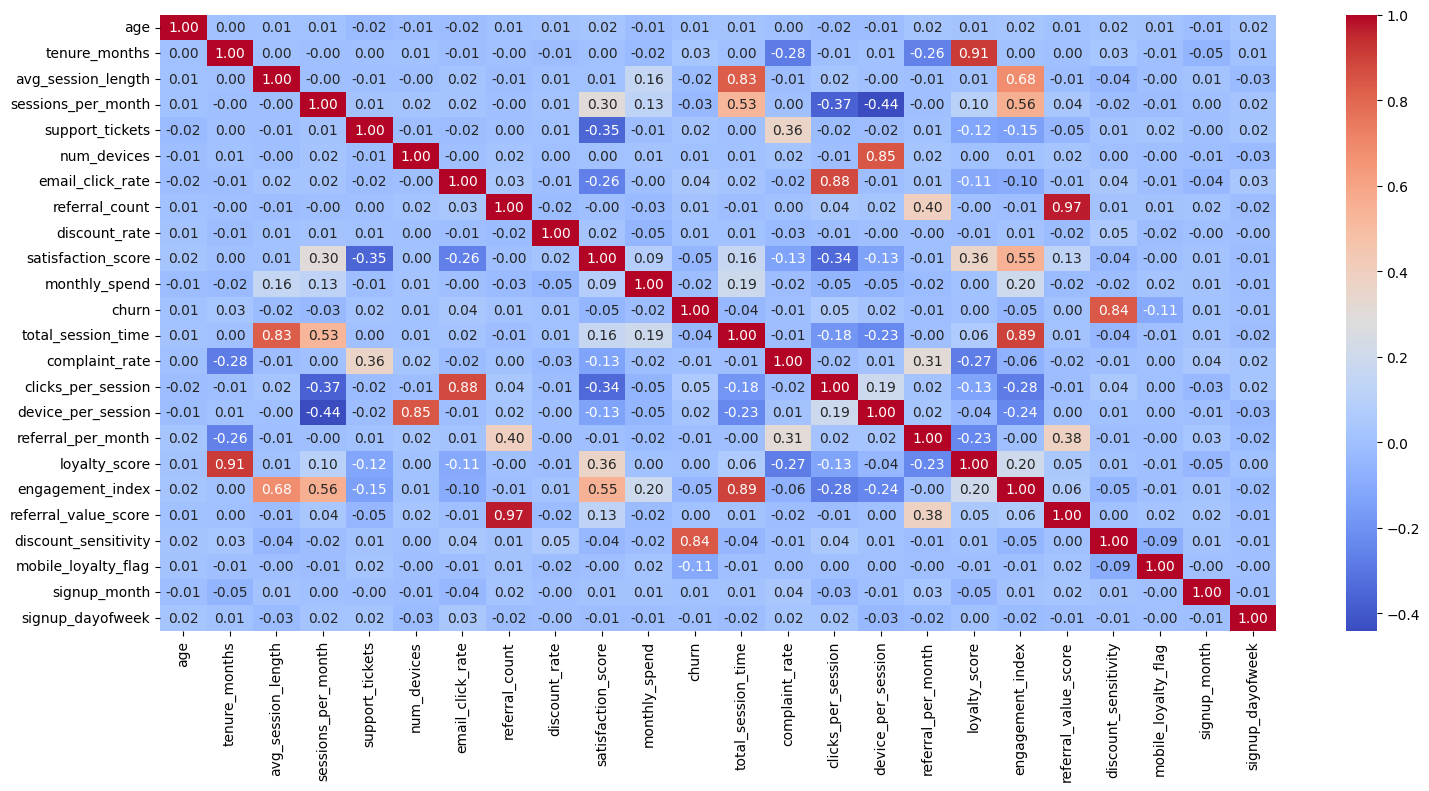

In [63]:
# heatmap for each features for correlation check
import seaborn as sns

plt.figure(figsize=(18,8))
sns.heatmap(new_numeric_cols.drop('customer_id', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

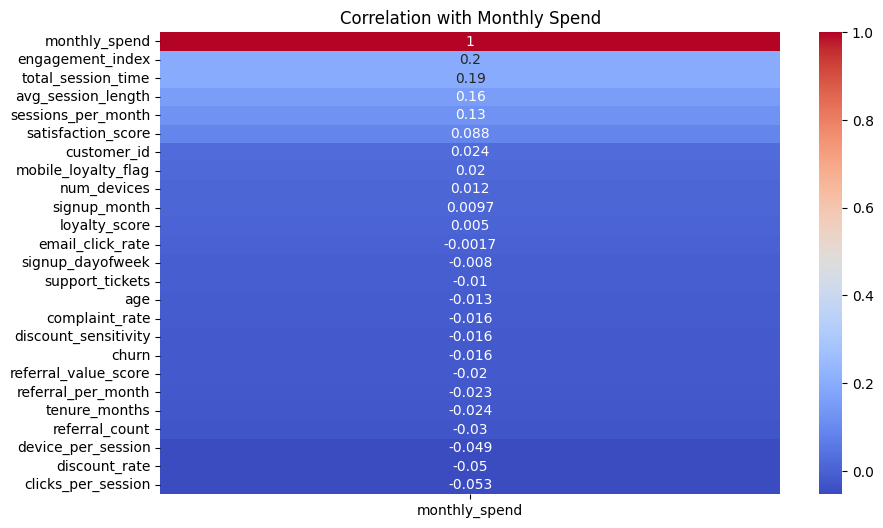

In [64]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr()[['monthly_spend']].sort_values(by='monthly_spend', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Monthly Spend")
plt.show()

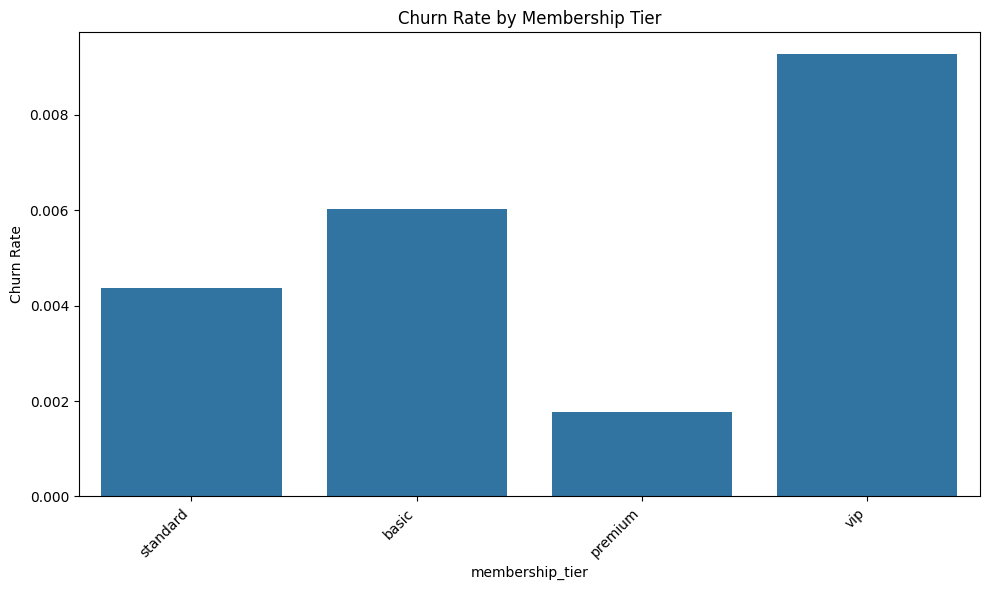

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='membership_tier', y='churn', data=df, ci=None)
plt.title('Churn Rate by Membership Tier')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()